In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
inj_blind = pd.read_csv("../psrc_lists/injected_2_10_psrcs__2aspcmsubqm2_fitel_0f09-to-35f5Hz_qc_0p6rr_M_PdoCals_dt20_snr_iter1_4.0sigma.csv")
inj = pd.read_csv("../psrc_lists/fake_pnt_amplitudes.csv")

In [38]:
inj_all = pd.merge(inj,inj_blind,left_on=['Cluster','project','scanno'],right_on=["cluster","project","scanno"],how="outer")

In [39]:
import astropy.units as u
from astropy.coordinates import SkyCoord

In [40]:
c1 = SkyCoord(inj_all["RA"]*u.deg,inj_all["DEC"]*u.deg,frame="icrs")
c2 = SkyCoord(inj_all["ra_deg"]*u.deg,inj_all["dec_deg"]*u.deg,frame="icrs")

In [41]:
sep = (c1.separation(c2).arcsecond)

In [42]:
inj_all["sep_match"]=sep

In [43]:
inj_found = inj_all.loc[inj_all["sep_match"]<18.0]

In [46]:
inj_not_found = pd.merge(inj, inj_found, left_on=['Cluster','project','scanno','amp_jy'], right_on=['Cluster','project','scanno','amp_jy'],how="outer", indicator=True)
inj_not_found = inj_not_found[inj_not_found['_merge'] == 'left_only']
cluster_centers = pd.read_csv("../catalogs/cluster_map_centers.csv")
inj_not_found = pd.merge(inj_not_found,cluster_centers,how="left",left_on=["Cluster"],right_on=["cluster"])

In [47]:
len(inj_not_found)+len(inj_found) == len(inj)

True

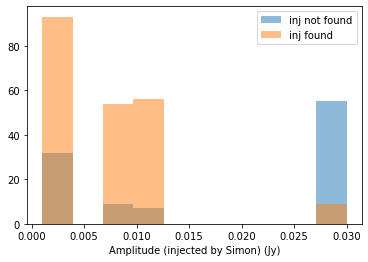

In [48]:
plt.hist(inj_not_found["amp_jy"],alpha=0.5,label="inj not found")
plt.hist(inj_found["amp_jy"],alpha=0.5,label="inj found")
plt.xlabel("Amplitude (injected by Simon) (Jy)")
plt.legend()

In [49]:
c1 = SkyCoord(inj_not_found["RA_x"]*u.deg,inj_not_found["DEC_x"]*u.deg, frame='icrs')
c2 = SkyCoord(inj_not_found["ra"]*u.deg,inj_not_found["dec"]*u.deg,frame="icrs")
sep = c1.separation(c2)
inj_not_found["dist_center_radians"]=sep.radian

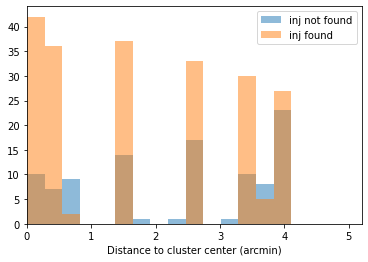

In [50]:
plt.hist(inj_not_found["dist_center_radians"]*60*180/np.pi,bins=np.linspace(0,5.2,20),alpha=0.5,label="inj not found")
plt.hist(inj_found["dist_center_radians"]*60*180/np.pi,bins=np.linspace(0,5.2,20),alpha=0.5,label="inj found")
plt.xlim(0,5.2)
plt.xlabel("Distance to cluster center (arcmin)")
plt.legend()

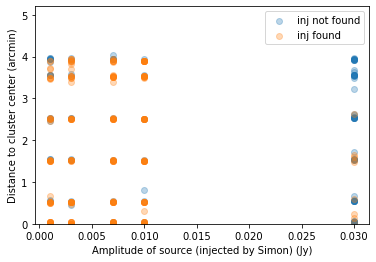

In [51]:
plt.scatter(inj_not_found["amp_jy"],inj_not_found["dist_center_radians"]*60*180/np.pi,label="inj not found",alpha=0.3)
plt.scatter(inj_found["amp_jy"],inj_found["dist_center_radians"]*60*180/np.pi,label="inj found",alpha=0.3)
plt.ylim(0,5.2)
plt.xlabel("Amplitude of source (injected by Simon) (Jy)")
plt.ylabel("Distance to cluster center (arcmin)")
plt.legend()

Text(0, 0.5, 'Integrated flux (fitted by Karen)')

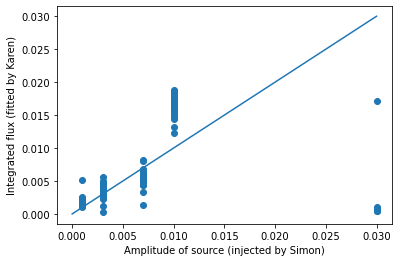

In [52]:
plt.scatter(inj_found["amp_jy"],inj_found["amp_fit"])
plt.plot(np.linspace(0,0.03,len(inj_found)),np.linspace(0,0.03,len(inj_found)))
plt.xlabel("Amplitude of source (injected by Simon)")
plt.ylabel("Integrated flux (fitted by Karen)")

Text(0, 0.5, 'Amplitude of source (fitted by Karen)')

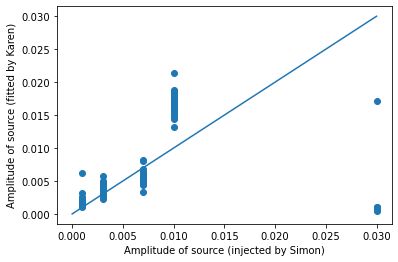

In [110]:
plt.scatter(inj_found["amp_jy"],inj_found["amp_fit"])
plt.plot(np.linspace(0,0.03,len(inj_found)),np.linspace(0,0.03,len(inj_found)))
plt.xlabel("Amplitude of source (injected by Simon)")
plt.ylabel("Amplitude of source (fitted by Karen)")